In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
import statsmodels

In [34]:
import statsmodels.api as smodel

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
import sklearn

In [98]:
from sklearn.linear_model import LinearRegression

In [149]:
dataset=pd.read_csv(r"C:\Users\rajaa\Downloads\advertising.csv")

In [17]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='TV', ylabel='Sales'>

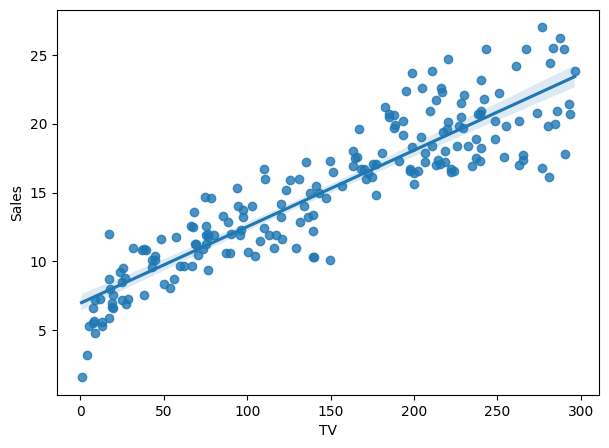

In [151]:
plt.figure(figsize=(7,5))
sns.regplot(x=dataset.TV, y=dataset.Sales)

<Axes: xlabel='Newspaper', ylabel='Sales'>

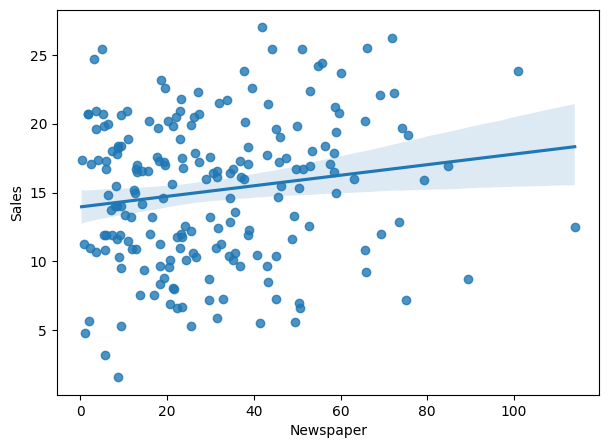

In [19]:
plt.figure(figsize=(7,5))
sns.regplot(x=dataset.Newspaper, y=dataset.Sales)

<Axes: xlabel='Radio', ylabel='Sales'>

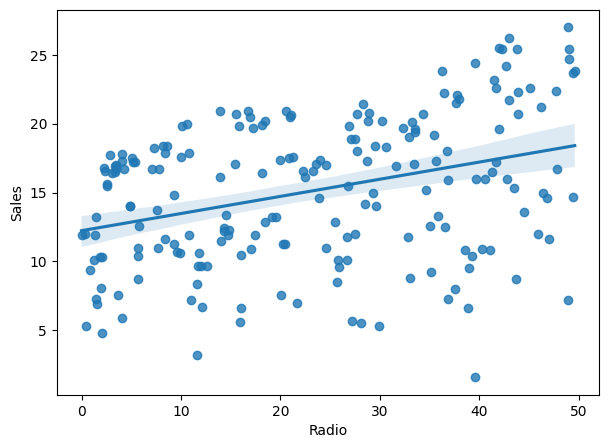

In [20]:
plt.figure(figsize=(7,5))
sns.regplot(x=dataset.Radio, y=dataset.Sales)

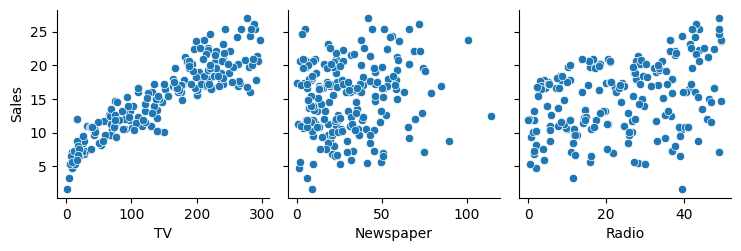

In [21]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'])

In [55]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

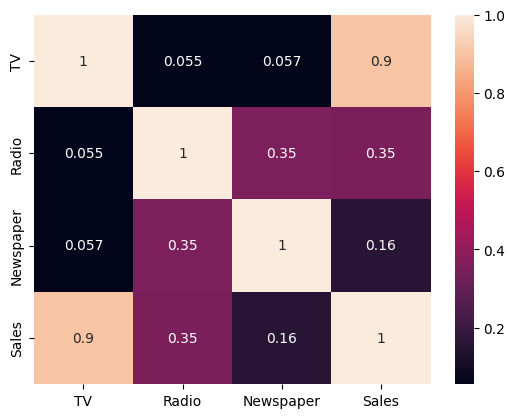

In [58]:
sns.heatmap(dataset.corr(), annot=True)

In [22]:
X=dataset['TV']
y=dataset['Sales']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [24]:
X_train.shape

(140,)

##### y = c + mx

In [35]:
X_train_sm = smodel.add_constant(X_train)

In [37]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [39]:
mod = smodel.OLS(y_train, X_train_sm)

In [41]:
sm_model=mod.fit()

In [42]:
sm_model.params

const    6.948683
TV       0.054546
dtype: float64

In [43]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        20:57:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

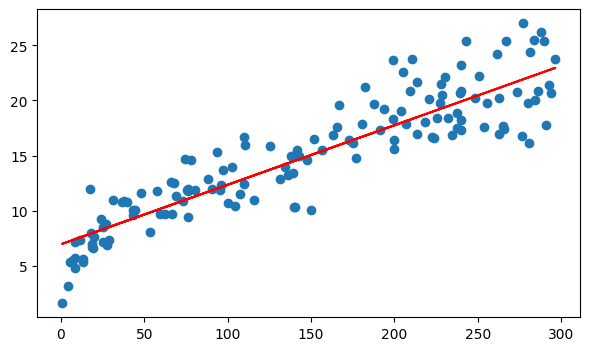

In [52]:
# y= 6.948683 + 0.054 * TV

plt.figure(figsize=(7,4))
plt.scatter(x=X_train, y=y_train)
plt.plot(X_train, 6.948683+0.054*X_train, 'r')
plt.show()

In [60]:
#error = y-y_pred
y_train_pred = sm_model.predict(X_train_sm)

In [80]:
res = y_train - y_train_pred

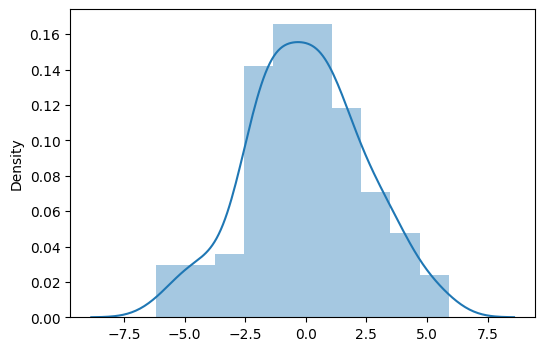

In [75]:
plt.figure(figsize=(6,4))
sns.distplot(res)
plt.show()

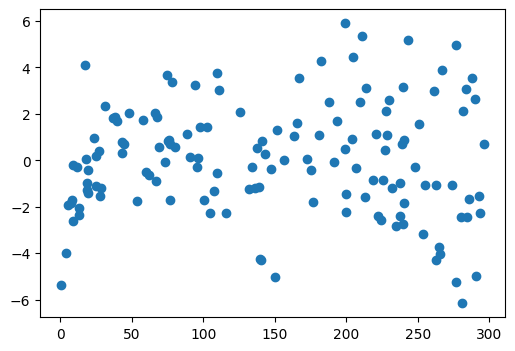

In [71]:
plt.figure(figsize=(6,4))
plt.scatter(x=X_train, y=res)
plt.show()

In [76]:
X_test_sm= smodel.add_constant(X_test)

In [77]:
y_test_pred = sm_model.predict(X_test_sm)

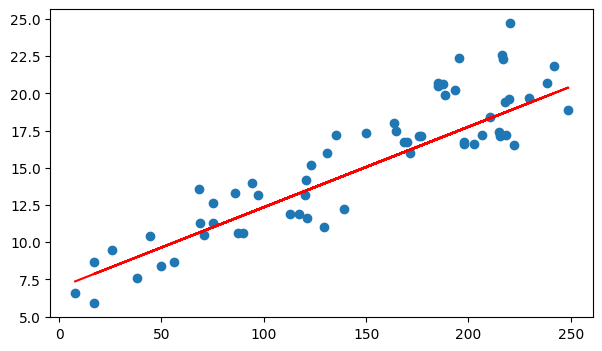

In [83]:
# y= 6.948683 + 0.054 * TV

plt.figure(figsize=(7,4))
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, 6.948683+0.054*X_test, 'r')
plt.show()

In [89]:
# r square
train_r2= r2_score(y_train, y_train_pred)
train_r2

0.8157933136480389

In [90]:
test_r2= r2_score(y_test, y_test_pred)
test_r2

0.792103160124566

In [92]:
train_mse= mean_squared_error(y_train, y_train_pred)
train_mse

5.752400386486835

In [93]:
test_mse= mean_squared_error(y_test, y_test_pred)
test_mse

4.077556371826953

In [99]:
lm= LinearRegression()

In [100]:
ln_model= lm.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [102]:
X_train.shape

(140,)

In [103]:
X_train.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [106]:
X_train_lm= X_train.values.reshape(-1, 1)

In [115]:
X_test_lm= X_test.values.reshape(-1, 1)

In [107]:
ln_model= lm.fit(X_train_lm, y_train)

In [112]:
print(ln_model.coef_)
print(ln_model.intercept_)

[0.05454575]
6.948683200001357


In [114]:
y_train_predlm = ln_model.predict(X_train_lm)

In [117]:
# r square
lmtrain_r2= r2_score(y_train, y_train_predlm)
lmtrain_r2

0.8157933136480389

In [118]:
y_test_predlm = ln_model.predict(X_test_lm)

In [119]:
# r square
lmtest_r2= r2_score(y_test, y_test_predlm)
lmtest_r2

0.7921031601245662

In [122]:
lmtrain_mse= mean_squared_error(y_train, y_train_predlm)
lmtrain_mse

5.752400386486835

In [121]:
lmtest_mse= mean_squared_error(y_test, y_test_predlm)
lmtest_mse

4.077556371826948

## Multiple Linear Regression

In [241]:
import numpy as np
import pandas as pd

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
from sklearn.preprocessing import MinMaxScaler

In [272]:
from sklearn.model_selection import train_test_split

In [243]:
import warnings
warnings.filterwarnings("ignore")

In [244]:
dataset =  pd.read_csv(r"C:\Users\rajaa\Downloads\Housing.csv")

In [245]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [246]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [247]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


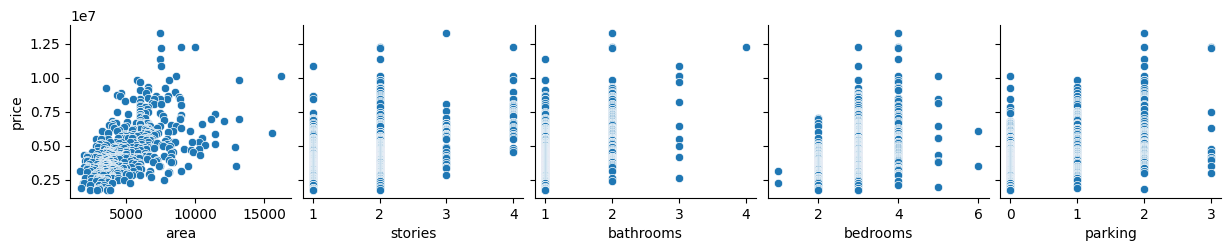

In [248]:
sns.pairplot(x_vars=['area','stories', 'bathrooms', 'bedrooms', 'parking'], y_vars=['price'], data=dataset)

<Figure size 1600x2000 with 0 Axes>

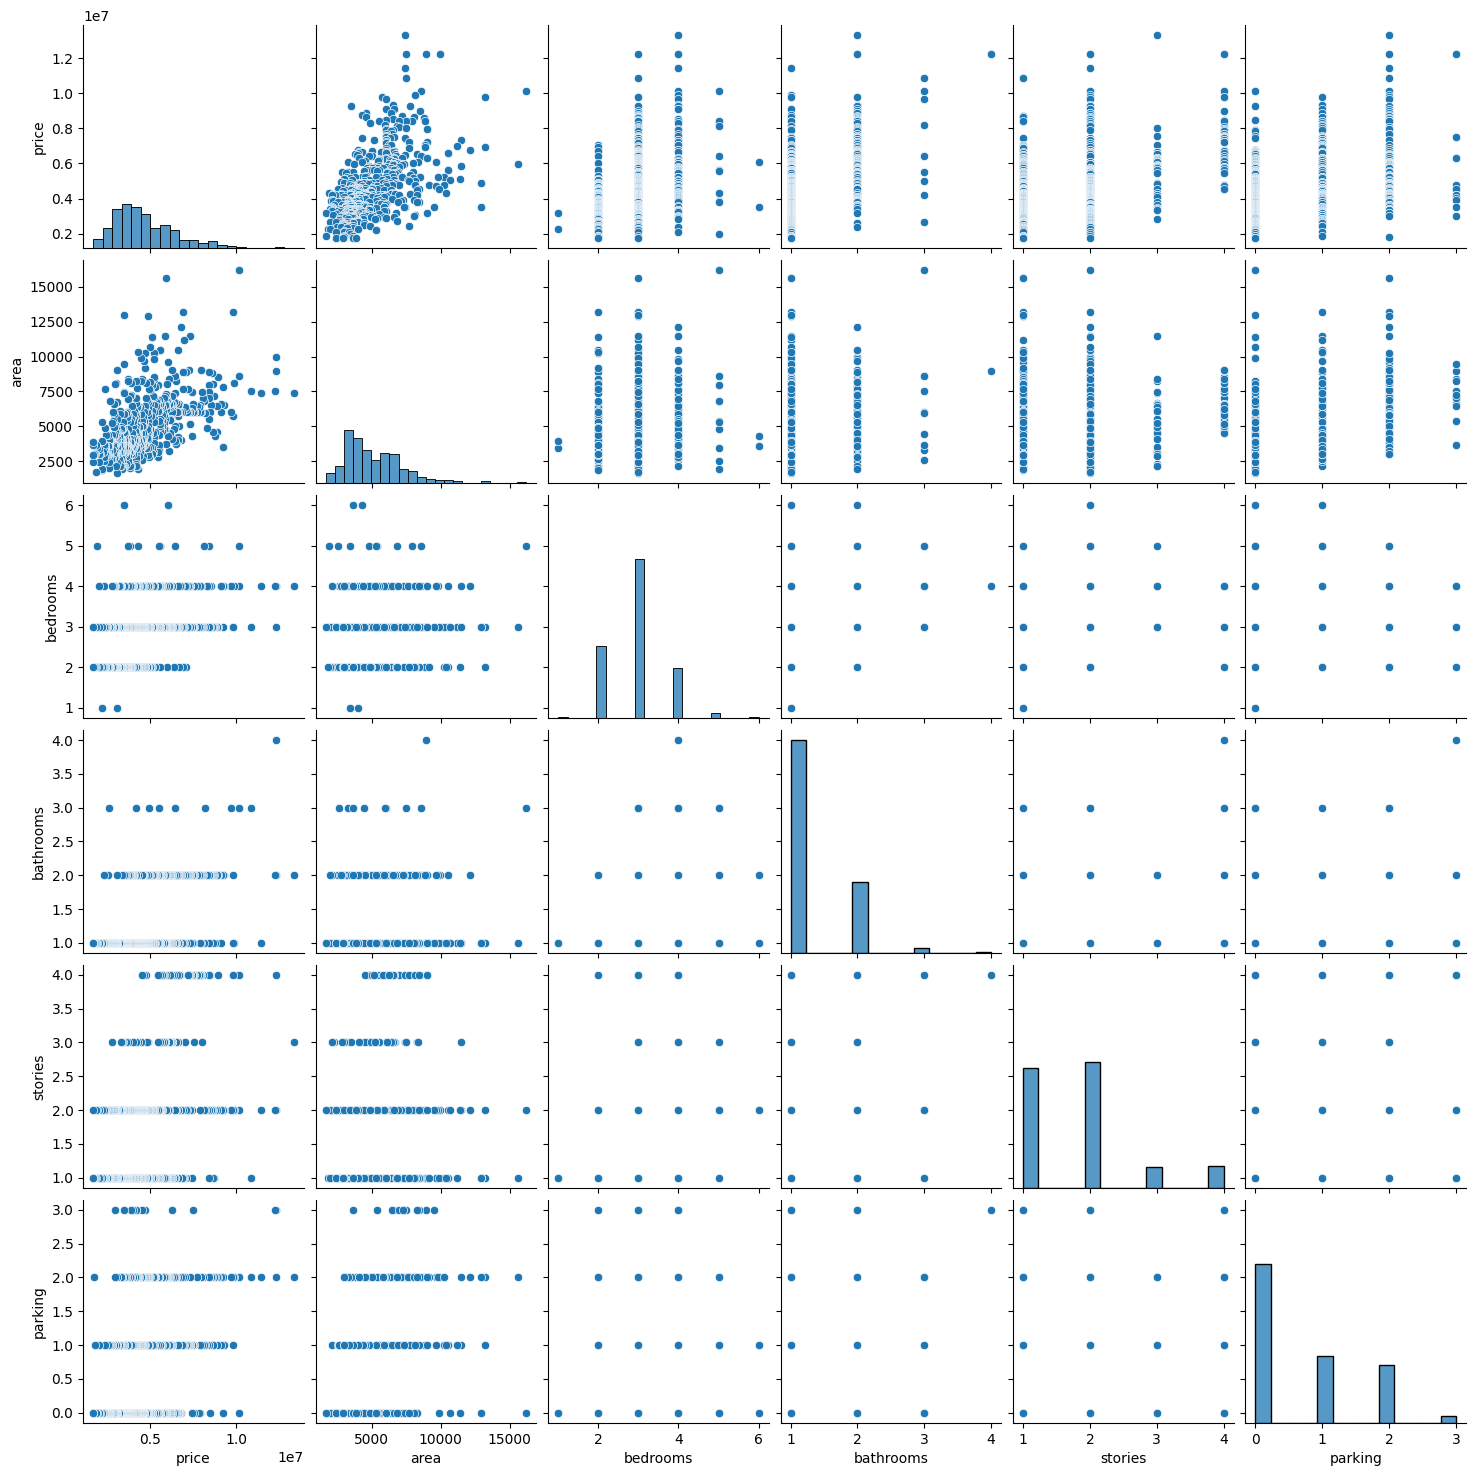

In [249]:
plt.figure(figsize=(16,20))
sns.pairplot(dataset)
plt.show()

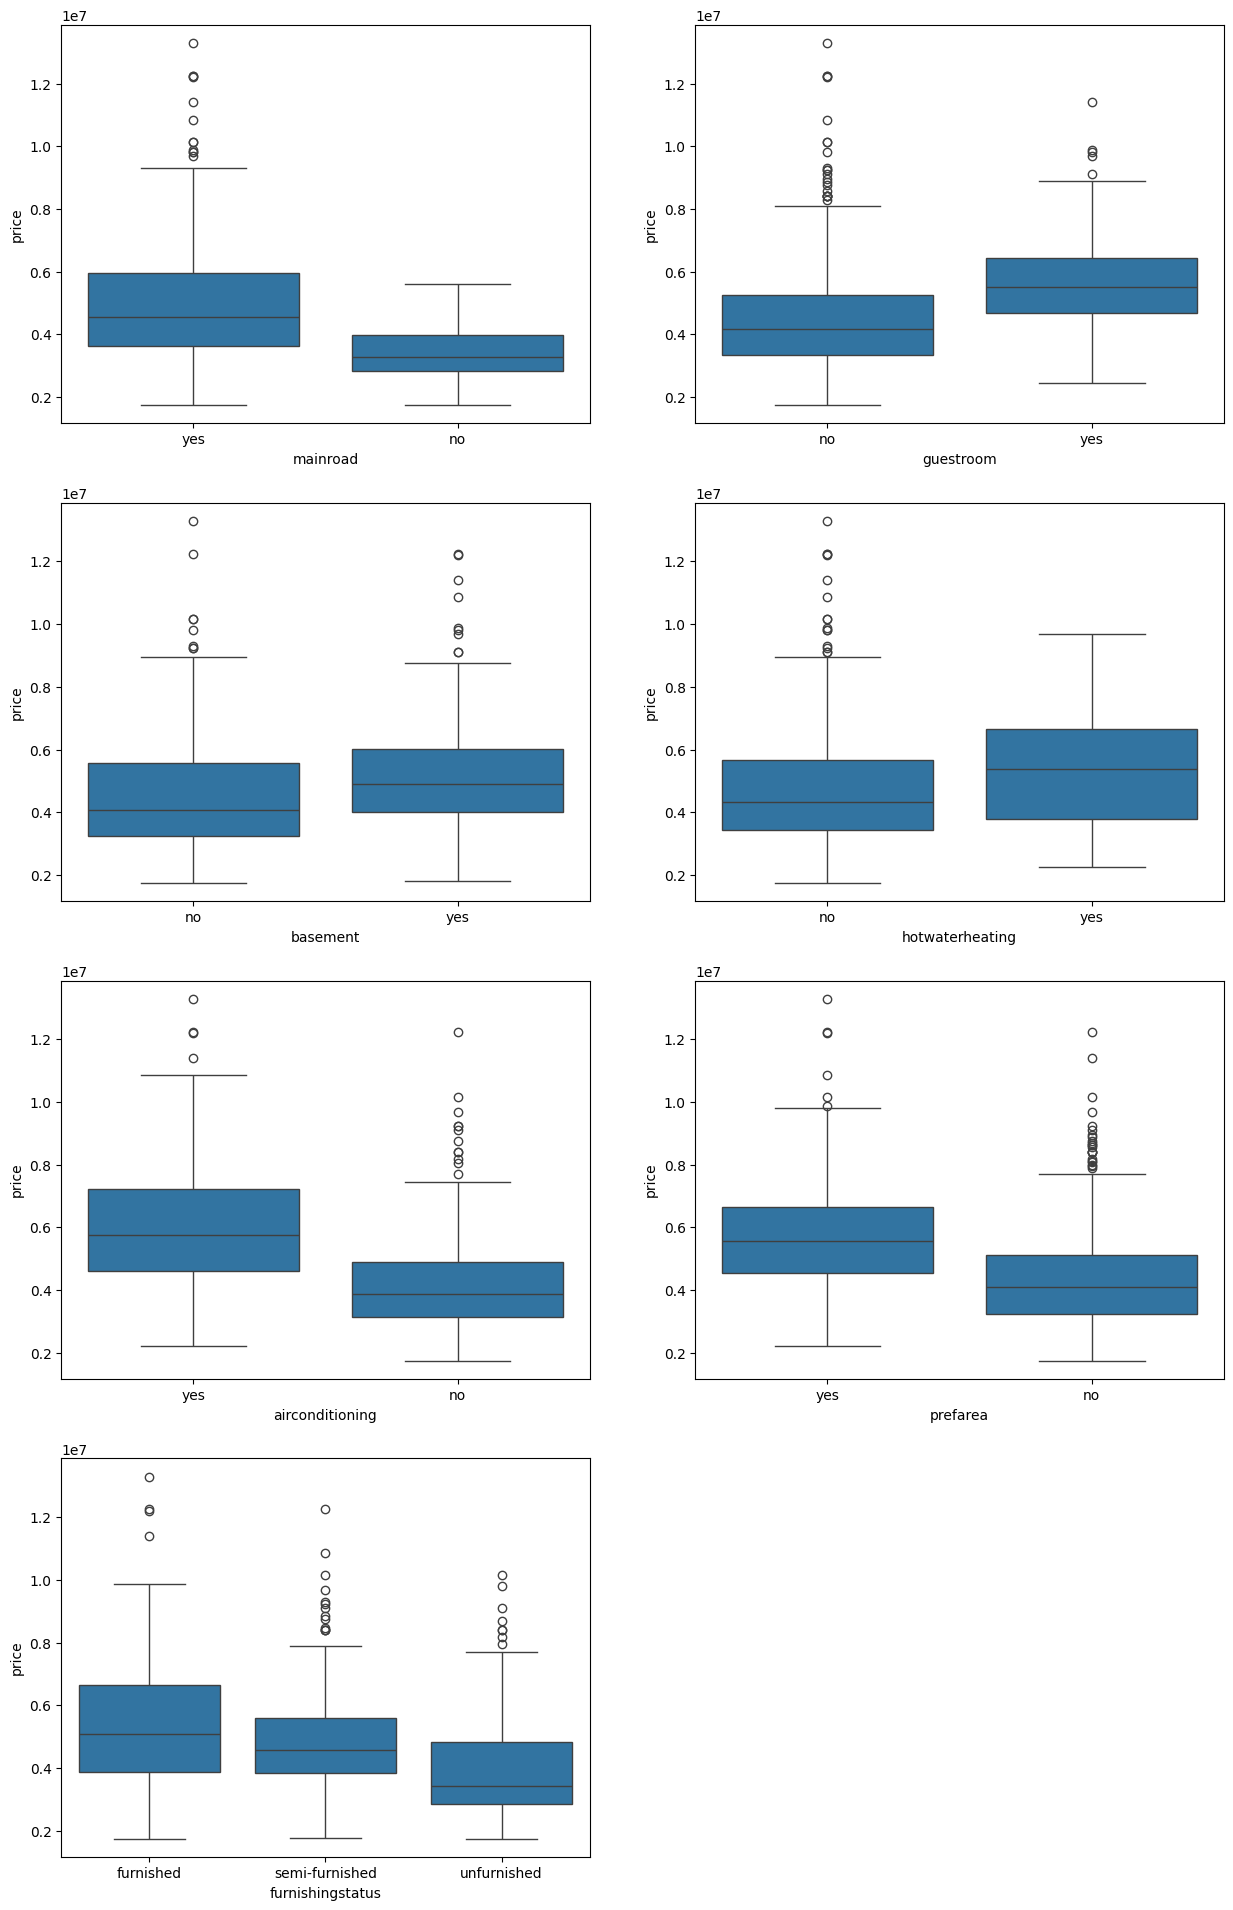

In [250]:
plt.figure(figsize=(15,30))
plt.subplot(5,2,1)
sns.boxplot(x='mainroad', y='price', data=dataset)
plt.subplot(5,2,2)
sns.boxplot(x='guestroom', y='price', data=dataset)
plt.subplot(5,2,3)
sns.boxplot(x='basement', y='price', data=dataset)
plt.subplot(5,2,4)
sns.boxplot(x='hotwaterheating', y='price', data=dataset)
plt.subplot(5,2,5)
sns.boxplot(x='airconditioning', y='price', data=dataset)
plt.subplot(5,2,6)
sns.boxplot(x='prefarea', y='price', data=dataset)
plt.subplot(5,2,7)
sns.boxplot(x='furnishingstatus', y='price', data=dataset)
plt.show()

In [251]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [252]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [253]:
cols=['mainroad','guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']

In [254]:
dataset[cols]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [255]:
dataset[cols].apply(lambda x: x.map({'yes':1, 'no':0}))

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [257]:
dataset[cols]=dataset[cols].apply(lambda x: x.map({'yes':1, 'no':0}))

In [258]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [259]:
status=pd.get_dummies(dataset['furnishingstatus'], drop_first=True, dtype=int)

In [260]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [261]:
dataset = pd.concat([dataset, status], axis=1)

In [263]:
dataset.drop('furnishingstatus', axis=1, inplace=True)

In [264]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [265]:
dataset.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


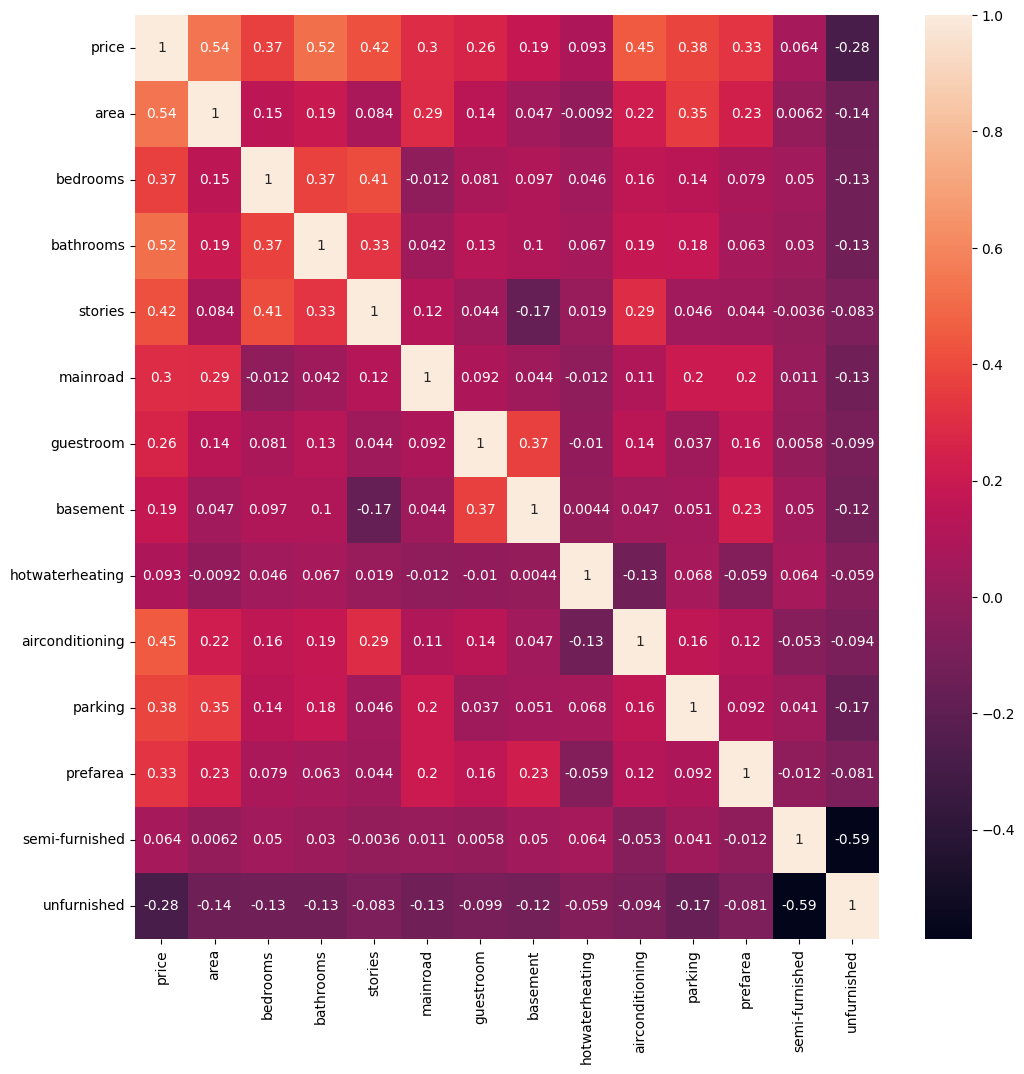

In [267]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [441]:
df_train, df_test= train_test_split(dataset, train_size=0.70, random_state=100 )

In [442]:
colm= ['price','area','bedrooms','bathrooms','stories','parking']

In [443]:
df_train[colm]

,price,area,bedrooms,bathrooms,stories,parking
359,3710000,3600,3,1,1,1
19,8855000,6420,3,2,2,1
159,5460000,3150,3,2,1,0
35,8080940,7000,3,2,4,2
28,8400000,7950,5,2,2,2
...,...,...,...,...,...,...
526,2310000,3180,2,1,1,0
53,7350000,5150,3,2,4,2
350,3780000,3420,2,1,2,1
79,6650000,6000,3,2,3,0


In [444]:
scalar=MinMaxScaler()

In [445]:
df_train[colm]=scalar.fit_transform(df_train[colm])

In [446]:
df_train[colm]

,price,area,bedrooms,bathrooms,stories,parking
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667
...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,0.000000
53,0.484848,0.291623,0.4,0.5,1.000000,0.666667
350,0.175758,0.139388,0.2,0.0,0.333333,0.333333
79,0.424242,0.366420,0.4,0.5,0.666667,0.000000


In [447]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [299]:
y = df_train.pop('price')

In [300]:
y_train= y
X_train=df_train

In [303]:
X_train=df_train['area']

In [304]:
X_train

359    0.155227
19     0.403379
159    0.115628
35     0.454417
28     0.538015
         ...   
526    0.118268
53     0.291623
350    0.139388
79     0.366420
520    0.516015
Name: area, Length: 381, dtype: float64

In [305]:
import statsmodels.api as sm

In [307]:
X_train=sm.add_constant(X_train)

In [309]:
statsmod=sm.OLS(y_train, X_train)

In [310]:
sm_model=statsmod.fit()

In [311]:
sm_model.params

const    0.126894
area     0.462192
dtype: float64

In [313]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           3.15e-29
Time:                        23:31:40   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
X_train=df_train[['area','bedrooms']]

In [316]:
X_train=sm.add_constant(X_train)
statsmod=sm.OLS(y_train, X_train)
sm_model=statsmod.fit()

In [317]:
sm_model.params

const       0.009919
area        0.436721
bedrooms    0.321801
dtype: float64

In [318]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           5.30e-39
Time:                        23:41:11   Log-Likelihood:                 252.67
No. Observations:                 381   AIC:                            -499.3
Df Residuals:                     378   BIC:                            -487.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.020      0.497      0.620      -0.029       0.049
area           0.4367      0.036     12.281      0.000       0.367       0.507
bedrooms       0.3218      0.044      7.349      0.000       0.236       0.408
==============================================================================
Omnibus:                       55.492   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.431
Skew:                           0.781   Prob(JB):                     8.60e-26
Kurtosis:                       5.198   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
X_train=df_train[['area','bedrooms', 'bathrooms']]

In [320]:
X_train=sm.add_constant(X_train)
statsmod=sm.OLS(y_train, X_train)
sm_model=statsmod.fit()

In [321]:
sm_model.params

const        0.041352
area         0.392211
bedrooms     0.181863
bathrooms    0.259978
dtype: float64

In [322]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           3.12e-57
Time:                        23:42:08   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
X_train=df_train[['area','bedrooms', 'bathrooms', 'parking']]

In [324]:
X_train=sm.add_constant(X_train)
statsmod=sm.OLS(y_train, X_train)
sm_model=statsmod.fit()

In [325]:
sm_model.params

const        0.039609
area         0.352318
bedrooms     0.172577
bathrooms    0.254907
parking      0.072378
dtype: float64

In [326]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.34e-58
Time:                        23:42:53   Log-Likelihood:                 303.52
No. Observations:                 381   AIC:                            -597.0
Df Residuals:                     376   BIC:                            -577.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0396      0.018      2.225      0.027       0.005       0.075
area           0.3523      0.034     10.480      0.000       0.286       0.418
bedrooms       0.1726      0.041      4.220      0.000       0.092       0.253
bathrooms      0.2549      0.026      9.958      0.000       0.205       0.305
parking        0.0724      0.021      3.399      0.001       0.031       0.114
==============================================================================
Omnibus:                       41.938   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.777
Skew:                           0.586   Prob(JB):                     1.18e-20
Kurtosis:                       5.100   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
X_train = df_train

In [347]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [329]:
X_train_sm = sm.add_constant(X_train)

In [366]:
statsmod=sm.OLS(y_train, X_train_sm)
sm_model=statsmod.fit()

In [367]:
sm_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [368]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           8.83e-83
Time:                        00:11:33   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [369]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [370]:
VIF = pd.DataFrame()
VIF['variables']= X_train.columns
VIF['vif']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif']= round(VIF['vif'], 2)
VIF.sort_values(by=['vif'], ascending=False)

,variables,vif
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [380]:
X_train.drop('bedrooms', axis=1, inplace=True)

In [381]:
X_train_sm= sm.add_constant(X_train)

In [382]:
statsmod=sm.OLS(y_train, X_train_sm)
sm_model=statsmod.fit()

In [383]:
sm_model.params

const              0.035120
area               0.234970
bathrooms          0.196437
stories            0.117790
mainroad           0.048832
guestroom          0.030081
basement           0.023910
hotwaterheating    0.086381
airconditioning    0.066599
parking            0.062851
prefarea           0.059651
semi-furnished     0.000793
unfurnished       -0.031810
dtype: float64

In [384]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           2.35e-83
Time:                        00:19:35   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
VIF = pd.DataFrame()
VIF['variables']= X_train.columns
VIF['vif']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif']= round(VIF['vif'], 2)
VIF.sort_values(by=['vif'], ascending=False)

,variables,vif
3,mainroad,5.53
0,area,4.55
2,stories,2.24
8,parking,2.11
10,semi-furnished,1.97
5,basement,1.90
7,airconditioning,1.77
11,unfurnished,1.62
1,bathrooms,1.61
9,prefarea,1.51


In [386]:
X_train.drop('semi-furnished', axis=1, inplace=True)

In [387]:
X_train_sm= sm.add_constant(X_train)

In [388]:
statsmod=sm.OLS(y_train, X_train_sm)
sm_model=statsmod.fit()

In [391]:
sm_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [392]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                        00:23:15   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
VIF = pd.DataFrame()
VIF['variables']= X_train.columns
VIF['vif']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif']= round(VIF['vif'], 2)
VIF.sort_values(by=['vif'], ascending=False)

,variables,vif
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [395]:
y_train_pred=sm_model.predict(X_train_sm)

In [396]:
res= y_train - y_train_pred

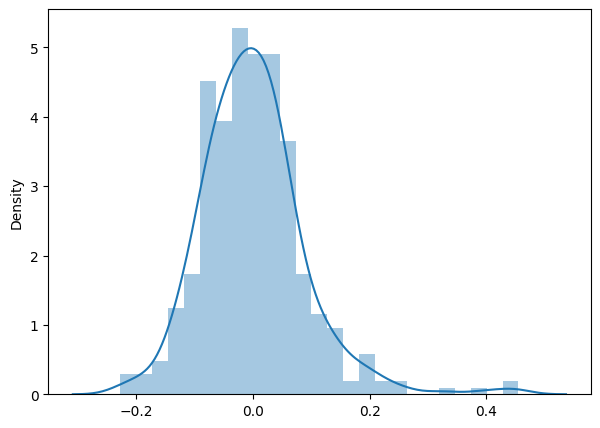

In [399]:
plt.figure(figsize=(7,5))
sns.distplot(res)
plt.show()

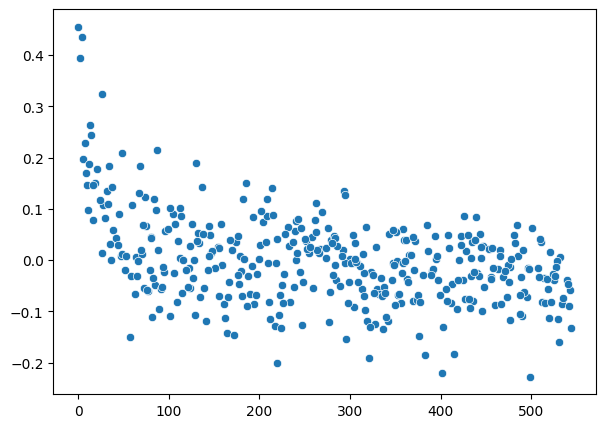

In [406]:

plt.figure(figsize=(7,5))
sns.scatterplot(res)
plt.show()

In [409]:
X_train_sm.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [412]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,0,1
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1,0
310,4130000,5985,3,1,1,1,0,1,0,0,0,0,1,0
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,0,0


In [413]:
colm= ['price','area','bedrooms','bathrooms','stories','parking']

In [415]:
df_test[colm]=scalar.transform(df_test[colm])

In [ ]:
X_test= df_test['area','bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished']

In [422]:
X_test= df_test.drop(['bedrooms','semi-furnished'], axis=1)

In [424]:
y_test = X_test.pop('price')

In [425]:
X_test

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,0.010032,0.5,0.333333,1,0,1,0,0,0.000000,1,1
191,0.780007,0.0,0.333333,1,1,1,0,0,0.000000,0,0
310,0.365100,0.0,0.000000,1,0,1,0,0,0.000000,0,0
46,0.366420,0.5,1.000000,1,0,0,0,1,0.333333,0,0


In [426]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

In [427]:
X_test_sm = sm.add_constant(X_test)

In [428]:
y_test_pred = sm_model.predict(X_test_sm)

In [429]:
res = y_test - y_test_pred

In [430]:
from sklearn.metrics import r2_score

In [431]:
r2_score(y_test, y_test_pred)

0.6713505684480789

In [433]:
r2_score(y_train, y_train_pred)

0.6800930630265902

In [436]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [449]:
y_train = df_train.pop('price')

In [450]:
X_train = df_train

In [454]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [451]:
lm = LinearRegression()

In [452]:
lm.fit(X_train, y_train)

LinearRegression()

In [455]:
rfe = RFE(lm, n_features_to_select=10)

In [456]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [457]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False])

In [459]:
rfe_op=list(zip(X_train.columns,rfe.support_, rfe.ranking_))

In [460]:
rfe_op

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [465]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False])

In [536]:
df_train.loc[:, rfe.support_]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
53,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
350,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
79,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [469]:
df_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [470]:
df_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [471]:
cols=df_train.columns[rfe.support_]

In [474]:
X_train = df_train[cols]

In [475]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [478]:
X_train_sm = sm.add_constant(X_train)

In [479]:
smod=sm.OLS(y_train, X_train_sm)

In [480]:
sm_model=smod.fit()

In [481]:
sm_model.params

const              0.002721
area               0.236257
bedrooms           0.066102
bathrooms          0.198169
stories            0.097722
mainroad           0.055649
guestroom          0.038136
hotwaterheating    0.089673
airconditioning    0.071079
parking            0.063739
prefarea           0.064326
dtype: float64

In [482]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.28e-82
Time:                        06:49:48   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
VIF = pd.DataFrame()
VIF['variables']= X_train.columns
VIF['vif']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif']= round(VIF['vif'], 2)
VIF.sort_values(by=['vif'], ascending=False)

,variables,vif
1,bedrooms,5.85
4,mainroad,5.53
0,area,4.66
3,stories,2.45
8,parking,2.11
7,airconditioning,1.75
2,bathrooms,1.64
9,prefarea,1.47
5,guestroom,1.30
6,hotwaterheating,1.13


In [491]:
X_train = X_train.drop('bedrooms', axis=1)

In [484]:
X_train_sm = X_train_sm.drop('bedrooms', axis=1)

In [485]:
smod=sm.OLS(y_train, X_train_sm)

In [486]:
sm_model=smod.fit()

In [488]:
sm_model.params

const              0.024223
area               0.236688
bathrooms          0.207021
stories            0.109585
mainroad           0.053643
guestroom          0.038979
hotwaterheating    0.092143
airconditioning    0.071028
parking            0.066868
prefarea           0.065258
dtype: float64

In [489]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           6.67e-83
Time:                        06:52:20   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
VIF = pd.DataFrame()
VIF['variables']= X_train.columns
VIF['vif']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif']= round(VIF['vif'], 2)
VIF.sort_values(by=['vif'], ascending=False)

,variables,vif
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [500]:
y_train_pred=sm_model.predict(X_train_sm)

In [501]:
y_train_pred

359    0.136896
19     0.471955
159    0.318751
35     0.514123
28     0.481968
         ...   
526    0.105859
53     0.475592
350    0.261818
79     0.451167
520    0.200000
Length: 381, dtype: float64

In [502]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [505]:
res= y_train - y_train_pred

In [506]:
res

359    0.032801
19     0.143196
159    0.002461
35     0.034010
28     0.093790
         ...   
526   -0.057374
53     0.009257
350   -0.086060
79    -0.026925
520   -0.139394
Length: 381, dtype: float64

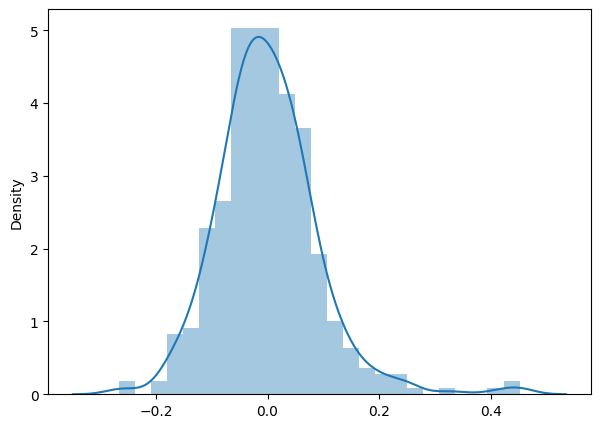

In [507]:
plt.figure(figsize=(7,5))
sns.distplot(res)
plt.show()

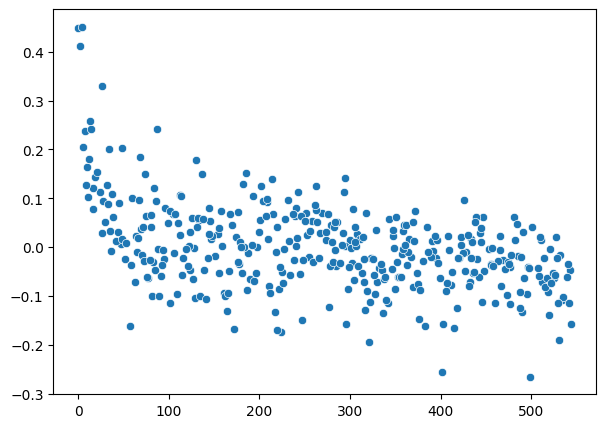

In [508]:
plt.figure(figsize=(7,5))
sns.scatterplot(res)
plt.show()

In [515]:
cols=['price',	'area',	'bedrooms',	'bathrooms',	'stories', 'parking']

In [518]:
df_test[cols]=scalar.transform(df_test[cols])

In [520]:
y_test=df_test.pop('price')

In [ ]:
df_test[cols]

In [526]:
X_test=df_test[X_train.columns]

In [528]:
X_test_sm=sm.add_constant(X_test)

In [529]:
y_test_pred = sm_model.predict(X_test_sm)

In [530]:
r2_score(y_test, y_test_pred)

0.6481740917926484

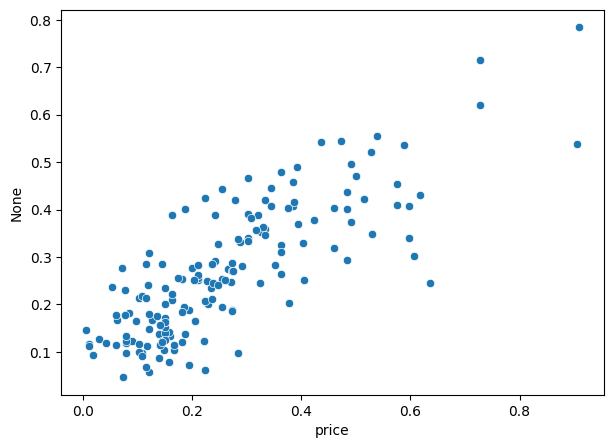

In [533]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.show()

In [5]:
num=int(input("Enter a number:"))
n1,n2=0,1
count=0
if num <0:
    print("Enter a positive number")
elif num == 0:
    print(n1)
else:
    while count<num:
        print(n1)
        n=n1+n2
        n1=n2
        n2=n
        count+=1

Enter a number: 2


0
1


In [27]:
import requests
import pandas as pd
import json

# api_key = "bb13f04fd0464da994cc7fb34d2f0ace"
url3="https://services.nvd.nist.gov/rest/json/cves/2.0?cveId=CVE-2019-1010218"
url1="https://services.nvd.nist.gov/rest/json/cves/2.0"
url="https://services.nvd.nist.gov/rest/json/cves/2.0?cpeName=cpe:2.3:o:microsoft:windows_10:1607:*:*:*:*:*:*:*"

d={0:['a','b','c','d'],1:[1,2,3,], 'i':7}
content = requests.get(url3)
dict=content.text
dict
ndict=json.loads(dict)
ndict
# df=pd.DataFrame(ndict)

{'resultsPerPage': 1,
 'startIndex': 0,
 'totalResults': 1,
 'format': 'NVD_CVE',
 'version': '2.0',
 'timestamp': '2023-11-16T17:07:19.793',
 'vulnerabilities': [{'cve': {'id': 'CVE-2019-1010218',
    'sourceIdentifier': 'josh@bress.net',
    'published': '2019-07-22T18:15:10.917',
    'lastModified': '2020-09-30T13:40:18.163',
    'vulnStatus': 'Analyzed',
    'descriptions': [{'lang': 'en',
      'value': "Cherokee Webserver Latest Cherokee Web server Upto Version 1.2.103 (Current stable) is affected by: Buffer Overflow - CWE-120. The impact is: Crash. The component is: Main cherokee command. The attack vector is: Overwrite argv[0] to an insane length with execl. The fixed version is: There's no fix yet."},
     {'lang': 'es',
      'value': 'El servidor web de Cherokee más reciente de Cherokee Webserver Hasta Versión 1.2.103 (estable actual) está afectado por: Desbordamiento de Búfer - CWE-120. El impacto es: Bloqueo. El componente es: Comando cherokee principal. El vector de ataqu

In [29]:
# Step 1:
import requests

# Step 2:
url = 'https://restcountries.eu/rest/v2/all'

# Step 3:
response = requests.get(url)

# Step 4:
storage = response.json()

# Solution:

storage[0]['currencies'][0]['code']

# Workflow

# Step 5: 
print(type(storage))

# Step 6:
print(len(storage))

# Step 7:
print(storage[0])

# Step 8:
print(type(storage[0]))

# Step 9:
print(storage[0]['currencies'])

# Step 10:
print(type(storage[0]['currencies']))

# Step 11:
print(storage[0]['currencies'][0])

# Step 12:
print(type(storage[0]['currencies'][0]))

# Step 13:
print(storage[0]['currencies'][0]['code'])

# Step 14:
for item in range(len(storage)):
     print(storage[item]['currencies'][0]['code'])

ConnectTimeout: HTTPSConnectionPool(host='restcountries.eu', port=443): Max retries exceeded with url: /rest/v2/all (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000013A5905AD10>, 'Connection to restcountries.eu timed out. (connect timeout=None)'))